In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/proj work dataset.xlsx


In [ ]:
import os

# List all files in the /kaggle/input directory
print(os.listdir('/kaggle/input/'))

['proj work dataset.xlsx']


In [ ]:
import pandas as pd
from tqdm import tqdm

# File path to your dataset
file_path = "/kaggle/input/proj work dataset.xlsx"

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Get sheet names
sheet_names = excel_file.sheet_names

# Progress bar to track loading of sheets
# Loop through the sheets with a progress bar, but process only the first sheet
for i, sheet_name in enumerate(tqdm(sheet_names, desc="Loading sheets")):
    if i == 0:  # Only process the first sheet
        sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)
        # Print that the first sheet was loaded
        print(f"Loaded the first sheet: {sheet_name}")
        break  # Exit the loop after the first sheet is processed

Loading sheets:   0%|          | 0/2 [02:44<?, ?it/s]

Loaded the first sheet: Schulz_2020


In [ ]:
# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(sheet_data.head())


First 5 rows of the dataset:
            Date/Time  Analysis run (RECORD,CR800Series_2)  \
0 2018-07-02 23:52:00                                 1489   
1 2018-07-02 23:53:00                                 1490   
2 2018-07-02 23:54:00                                 1491   
3 2018-07-02 23:55:00                                 1492   
4 2018-07-02 23:56:00                                 1493   

   Soil heat flux [W/m**2] (DiffVolt_1_AVG,CR800)  \
0                                            1.34   
1                                            1.34   
2                                            1.34   
3                                            1.34   
4                                            1.34   

   Soil heat flux [W/m**2] (DiffVolt_2_Avg,13477)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4            

In [ ]:
# Display data types of each column
print("\nData Types of Each Column:")
print(sheet_data.dtypes)


Data Types of Each Column:
Date/Time                                         datetime64[ns]
Analysis run (RECORD,CR800Series_2)                        int64
Soil heat flux [W/m**2] (DiffVolt_1_AVG,CR800)           float64
Soil heat flux [W/m**2] (DiffVolt_2_Avg,13477)           float64
vol SWC [m**3/m**3] (10 cm b.g.l. (average))             float64
Cond [mS/m] (10 cm b.g.l. (average))                     float64
T soil [°C] (10 cm b.g.l. (average))                     float64
vol SWC [m**3/m**3] (20 cm b.g.l. (average))             float64
Cond [mS/m] (20 cm b.g.l. (average))                     float64
T soil [°C] (20 cm b.g.l. (average))                     float64
vol SWC [m**3/m**3] (40 cm b.g.l. (average))             float64
Cond [mS/m] (40 cm b.g.l. (average))                     float64
T soil [°C] (40 cm b.g.l. (average))                     float64
vol SWC [m**3/m**3] (80 cm b.g.l. (average))             float64
Cond [mS/m] (80 cm b.g.l. (average))                     float

In [ ]:
print(sheet_data.columns)

Index(['Date/Time', 'Analysis run (RECORD,CR800Series_2)',
       'Soil heat flux [W/m**2] (DiffVolt_1_AVG,CR800)',
       'Soil heat flux [W/m**2] (DiffVolt_2_Avg,13477)',
       'vol SWC [m**3/m**3] (10 cm b.g.l. (average))',
       'Cond [mS/m] (10 cm b.g.l. (average))',
       'T soil [°C] (10 cm b.g.l. (average))',
       'vol SWC [m**3/m**3] (20 cm b.g.l. (average))',
       'Cond [mS/m] (20 cm b.g.l. (average))',
       'T soil [°C] (20 cm b.g.l. (average))',
       'vol SWC [m**3/m**3] (40 cm b.g.l. (average))',
       'Cond [mS/m] (40 cm b.g.l. (average))',
       'T soil [°C] (40 cm b.g.l. (average))',
       'vol SWC [m**3/m**3] (80 cm b.g.l. (average))',
       'Cond [mS/m] (80 cm b.g.l. (average))',
       'T soil [°C] (80 cm b.g.l. (average))', 'NET [W/m**2] (Average)'],
      dtype='object')


In [ ]:
sheet_data.rename(columns={
    'Date/Time': 'DateTime',
    'Analysis run (RECORD,CR800Series_2)': 'AnalysisRun',
    'Soil heat flux [W/m**2] (DiffVolt_1_AVG,CR800)': 'SoilHeatFlux_DiffVolt1',
    'Soil heat flux [W/m**2] (DiffVolt_2_Avg,13477)': 'SoilHeatFlux_DiffVolt2',
    'vol SWC [m**3/m**3] (10 cm b.g.l. (average))': 'VolSWC_10cm',
    'Cond [mS/m] (10 cm b.g.l. (average))': 'Conductivity_10cm',
    'T soil [°C] (10 cm b.g.l. (average))': 'SoilTemp_10cm',
    'vol SWC [m**3/m**3] (20 cm b.g.l. (average))': 'VolSWC_20cm',
    'Cond [mS/m] (20 cm b.g.l. (average))': 'Conductivity_20cm',
    'T soil [°C] (20 cm b.g.l. (average))': 'SoilTemp_20cm',
    'vol SWC [m**3/m**3] (40 cm b.g.l. (average))': 'VolSWC_40cm',
    'Cond [mS/m] (40 cm b.g.l. (average))': 'Conductivity_40cm',
    'T soil [°C] (40 cm b.g.l. (average))': 'SoilTemp_40cm',
    'vol SWC [m**3/m**3] (80 cm b.g.l. (average))': 'VolSWC_80cm',
    'Cond [mS/m] (80 cm b.g.l. (average))': 'Conductivity_80cm',
    'T soil [°C] (80 cm b.g.l. (average))': 'SoilTemp_80cm',
    'NET [W/m**2] (Average)': 'NET_Radiation'
}, inplace=True)

# Display the first few rows of the renamed DataFrame
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1',
       'SoilHeatFlux_DiffVolt2', 'VolSWC_10cm', 'Conductivity_10cm',
       'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm',
       'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation'],
      dtype='object')


In [ ]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(sheet_data.isnull().sum())


Missing Values in Each Column:
DateTime                   0
AnalysisRun                0
SoilHeatFlux_DiffVolt1     0
SoilHeatFlux_DiffVolt2    10
VolSWC_10cm               10
Conductivity_10cm          0
SoilTemp_10cm             10
VolSWC_20cm               10
Conductivity_20cm          0
SoilTemp_20cm             10
VolSWC_40cm               10
Conductivity_40cm          0
SoilTemp_40cm             10
VolSWC_80cm               10
Conductivity_80cm          0
SoilTemp_80cm             10
NET_Radiation             10
dtype: int64


In [ ]:
print("\nSummary Statistics for Numeric Columns:")
print(sheet_data.describe())


Summary Statistics for Numeric Columns:
                            DateTime    AnalysisRun  SoilHeatFlux_DiffVolt1  \
count                         425262  425262.000000           425262.000000   
mean   2018-12-16 05:34:51.330757376  224672.653896               -0.239515   
min              2018-07-02 23:52:00    1489.000000            -9999.000000   
25%              2018-09-26 04:50:15  107798.250000               -1.340000   
50%              2018-12-17 22:58:30  226961.500000                0.670000   
75%              2019-03-07 10:16:45  341396.750000                1.350000   
max              2019-06-01 10:03:00  447950.000000                5.050000   
std                              NaN  130998.155297               48.523335   

       SoilHeatFlux_DiffVolt2    VolSWC_10cm  Conductivity_10cm  \
count                425252.0  425252.000000      425262.000000   
mean                      0.0       0.210268          17.647522   
min                       0.0       0.081000  

In [ ]:
# Display unique values for categorical columns
categorical_cols = sheet_data.select_dtypes(include=['float','int']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(sheet_data[col].value_counts())


Unique values in 'AnalysisRun':
AnalysisRun
355959    3
193838    2
193818    2
193848    2
193847    2
         ..
143200    1
143199    1
143198    1
143197    1
447950    1
Name: count, Length: 425186, dtype: int64

Unique values in 'SoilHeatFlux_DiffVolt1':
SoilHeatFlux_DiffVolt1
 1.35    64168
 1.01    43425
 0.67    33883
 1.68    27382
 2.02    23364
         ...  
-3.54        2
-7.57        2
 4.54        1
 5.05        1
 3.20        1
Name: count, Length: 108, dtype: int64

Unique values in 'SoilHeatFlux_DiffVolt2':
SoilHeatFlux_DiffVolt2
0.0    425252
Name: count, dtype: int64

Unique values in 'VolSWC_10cm':
VolSWC_10cm
0.090    4037
0.254    3732
0.234    3452
0.212    3329
0.248    3234
         ... 
0.402       1
0.409       1
0.436       1
0.442       1
0.802       1
Name: count, Length: 332, dtype: int64

Unique values in 'Conductivity_10cm':
Conductivity_10cm
13.8    2875
18.6    2840
16.2    2810
10.0    2799
18.7    2797
        ... 
71.6       1
73.0       1
77.4

In [ ]:
number_of_entries = len(sheet_data)

print(f'The number of entries in the dataset is: {number_of_entries}')

The number of entries in the dataset is: 425262


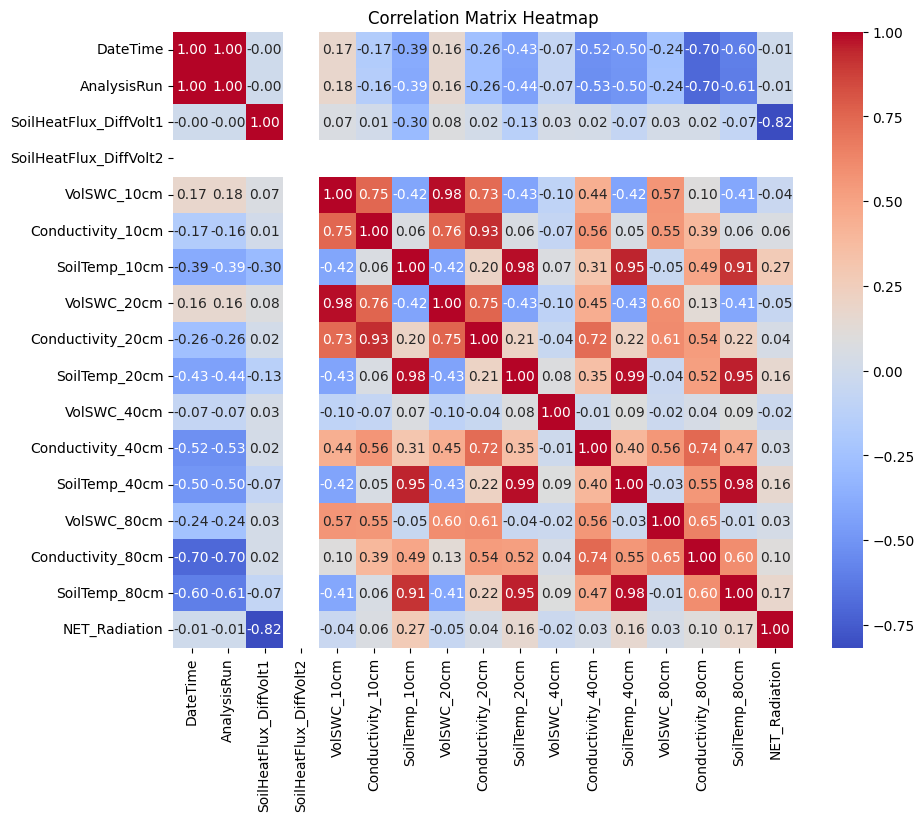

The variable most positively correlated with Soil Heat Flux is: VolSWC_20cm (Correlation: 0.08)
The variable most negatively correlated with Soil Heat Flux is: NET_Radiation (Correlation: -0.82)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sheet_data' is your DataFrame and 'Soil_Heat_Flux' is the column name for soil heat flux
correlation_matrix = sheet_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Get correlations with Soil Heat Flux
soil_heat_flux_correlations = correlation_matrix['SoilHeatFlux_DiffVolt1'].drop('SoilHeatFlux_DiffVolt1')

# Find the highest positive and negative correlations
max_positive_corr = soil_heat_flux_correlations.idxmax()
max_negative_corr = soil_heat_flux_correlations.idxmin()

print(f"The variable most positively correlated with Soil Heat Flux is: {max_positive_corr} (Correlation: {soil_heat_flux_correlations[max_positive_corr]:.2f})")
print(f"The variable most negatively correlated with Soil Heat Flux is: {max_negative_corr} (Correlation: {soil_heat_flux_correlations[max_negative_corr]:.2f})")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


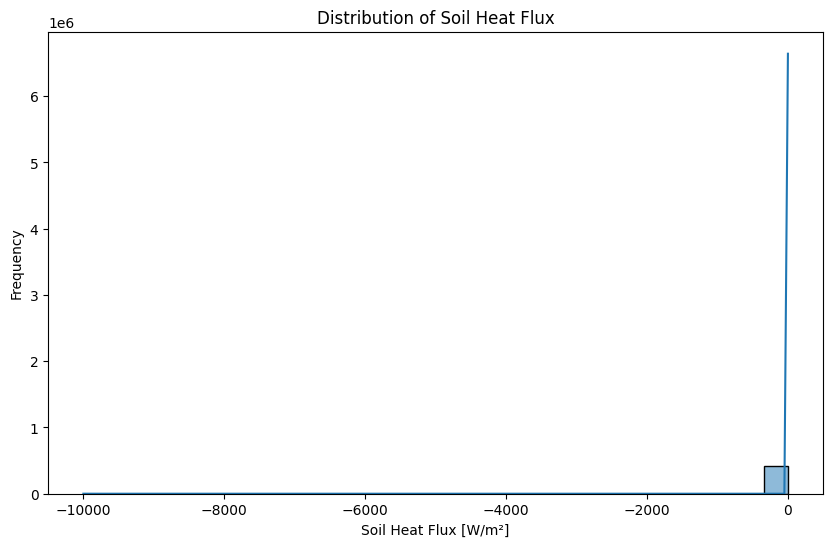

In [ ]:
# Histogram of soil heat flux
plt.figure(figsize=(10, 6))
sns.histplot(sheet_data['SoilHeatFlux_DiffVolt1'], bins=30, kde=True)
plt.title('Distribution of Soil Heat Flux')
plt.xlabel('Soil Heat Flux [W/m²]')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate the minimum and maximum values for the soil heat flux column
min_value = sheet_data['SoilHeatFlux_DiffVolt1'].min()
max_value = sheet_data['SoilHeatFlux_DiffVolt1'].max()

# Print the results
print(f"Range of Soil Heat Flux [W/m²]:")
print(f"Minimum Value: {min_value} W/m²")
print(f"Maximum Value: {max_value} W/m²")

Range of Soil Heat Flux [W/m²]:
Minimum Value: -9999.0 W/m²
Maximum Value: 5.05 W/m²


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


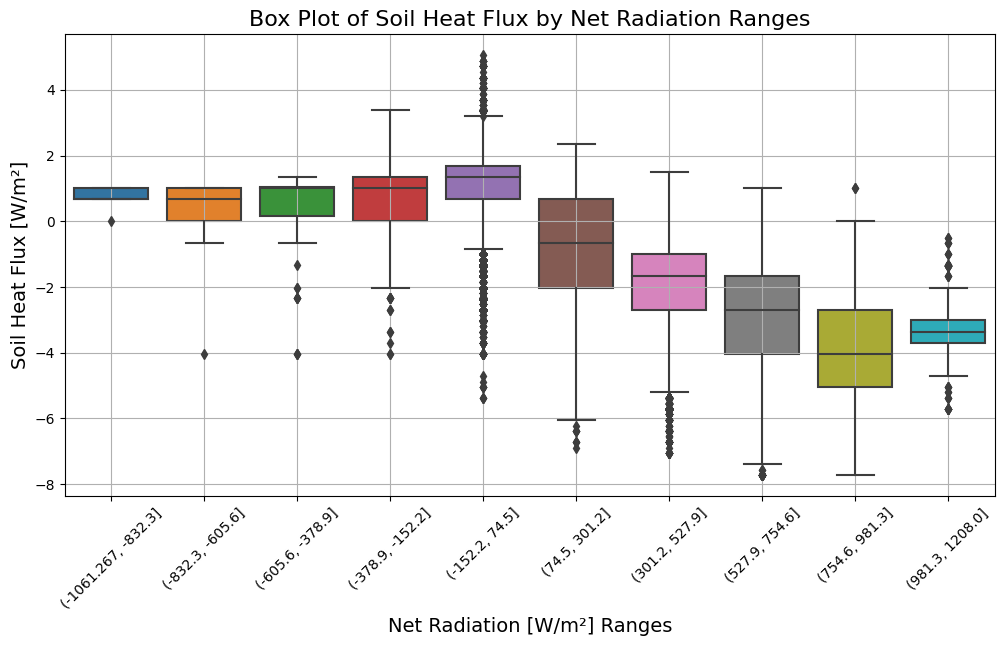

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(sheet_data['NET_Radiation'], bins=10),
            y='SoilHeatFlux_DiffVolt1',
            data=sheet_data)

plt.title('Box Plot of Soil Heat Flux by Net Radiation Ranges', fontsize=16)
plt.xlabel('Net Radiation [W/m²] Ranges', fontsize=14)
plt.ylabel('Soil Heat Flux [W/m²]', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


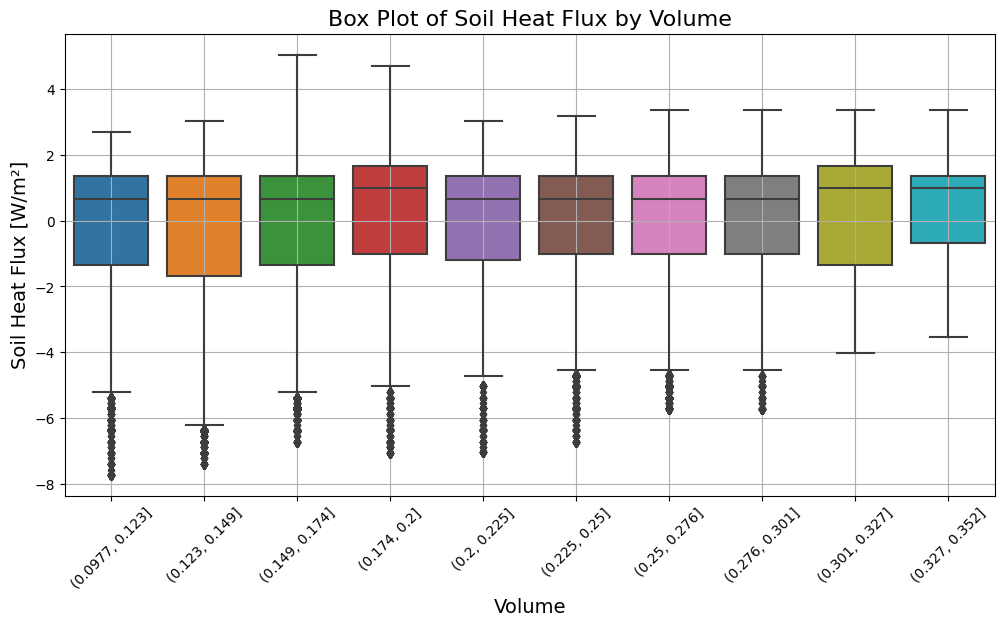

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(sheet_data['VolSWC_20cm'], bins=10),
            y='SoilHeatFlux_DiffVolt1',
            data=sheet_data)

plt.title('Box Plot of Soil Heat Flux by Volume', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Soil Heat Flux [W/m²]', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

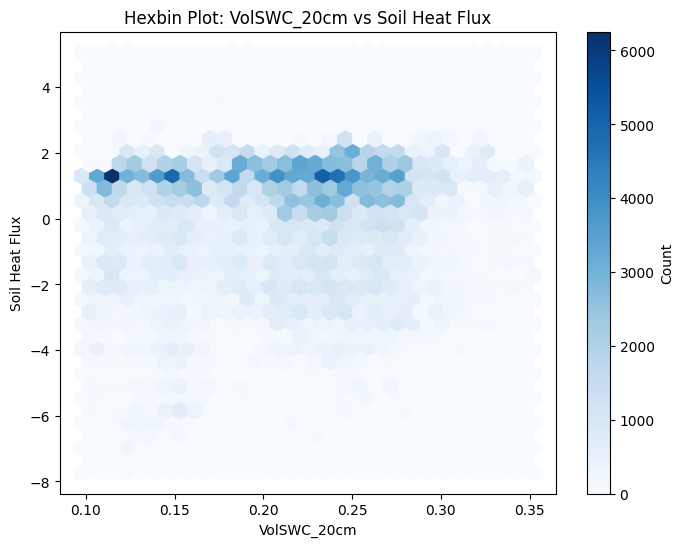

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(sheet_data[max_positive_corr], sheet_data['SoilHeatFlux_DiffVolt1'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title(f"Hexbin Plot: {max_positive_corr} vs Soil Heat Flux")
plt.xlabel(max_positive_corr)
plt.ylabel("Soil Heat Flux")
plt.show()


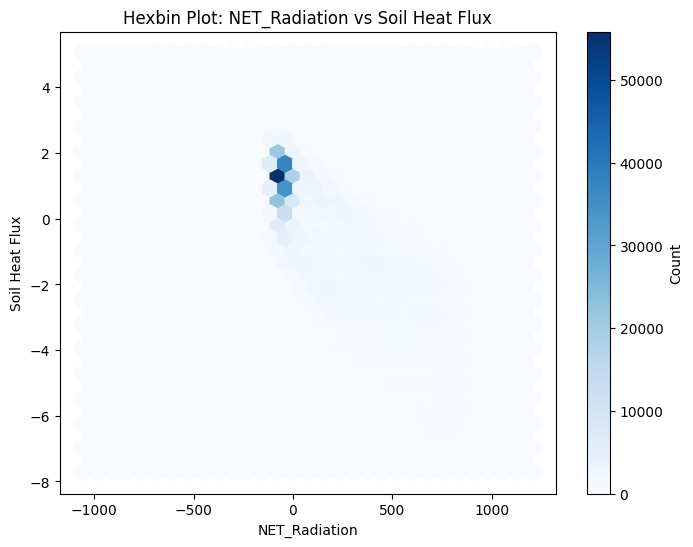

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(sheet_data[max_negative_corr], sheet_data['SoilHeatFlux_DiffVolt1'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title(f"Hexbin Plot: {max_negative_corr} vs Soil Heat Flux")
plt.xlabel(max_negative_corr)
plt.ylabel("Soil Heat Flux")
plt.show()

In [ ]:
sns.jointplot(x=sheet_data[max_positive_corr], y=sheet_data['SoilHeatFlux_DiffVolt1'], kind='kde', fill=True, cmap='Blues')
plt.suptitle(f"Density Plot: {max_positive_corr} vs Soil Heat Flux", y=1.02)
plt.xlabel(max_positive_corr)
plt.ylabel("Soil Heat Flux")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
sns.jointplot(x=sheet_data[max_negative_corr], y=sheet_data['SoilHeatFlux_DiffVolt1'], kind='kde', fill=True, cmap='Blues')
plt.suptitle(f"Density Plot: {max_negative_corr} vs Soil Heat Flux", y=1.02)
plt.xlabel(max_negative_corr)
plt.ylabel("Soil Heat Flux")
plt.show()

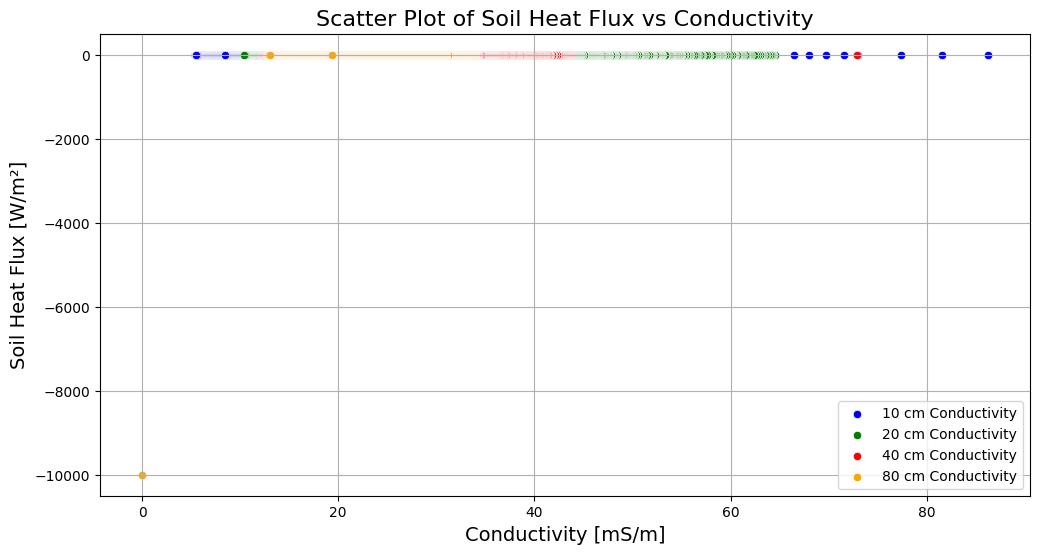

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot for Soil Heat Flux vs Conductivity at 10 cm depth
sns.scatterplot(data=sheet_data,
                x='Conductivity_10cm',
                y='SoilHeatFlux_DiffVolt1',
                color='blue',
                label='10 cm Conductivity')

# Scatter plot for Soil Heat Flux vs Conductivity at 20 cm depth
sns.scatterplot(data=sheet_data,
                x='Conductivity_20cm',
                y='SoilHeatFlux_DiffVolt1',
                color='green',
                label='20 cm Conductivity')

# Scatter plot for Soil Heat Flux vs Conductivity at 40 cm depth
sns.scatterplot(data=sheet_data,
                x='Conductivity_40cm',
                y='SoilHeatFlux_DiffVolt1',
                color='red',
                label='40 cm Conductivity')

# Scatter plot for Soil Heat Flux vs Conductivity at 80 cm depth
sns.scatterplot(data=sheet_data,
                x='Conductivity_80cm',
                y='SoilHeatFlux_DiffVolt1',
                color='orange',
                label='80 cm Conductivity')

# Add titles and labels
plt.title('Scatter Plot of Soil Heat Flux vs Conductivity', fontsize=16)
plt.xlabel('Conductivity [mS/m]', fontsize=14)
plt.ylabel('Soil Heat Flux [W/m²]', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Diurnal Variation of Soil Heat Flux')

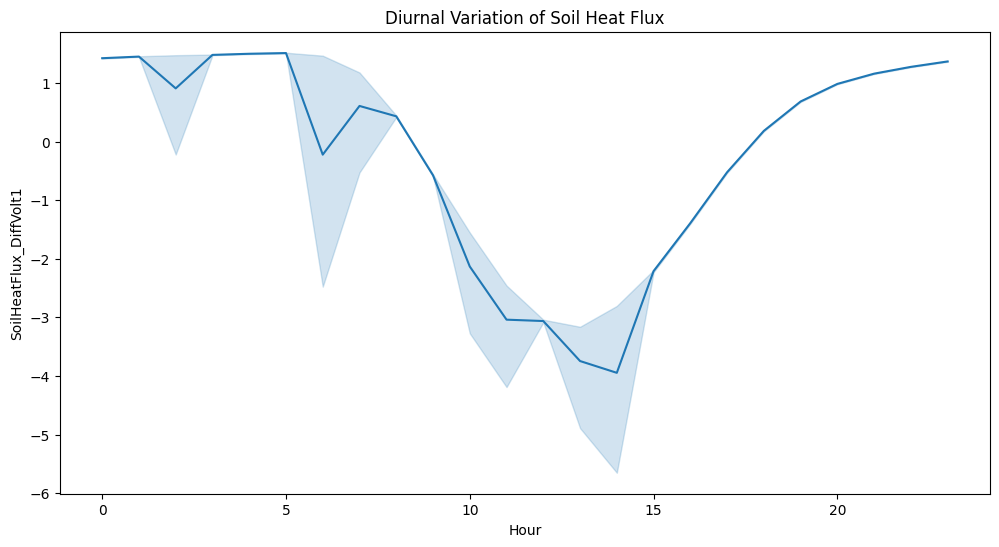

In [ ]:
sheet_data['Hour'] = sheet_data['DateTime'].dt.hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='SoilHeatFlux_DiffVolt1', data=sheet_data)
plt.title('Diurnal Variation of Soil Heat Flux')

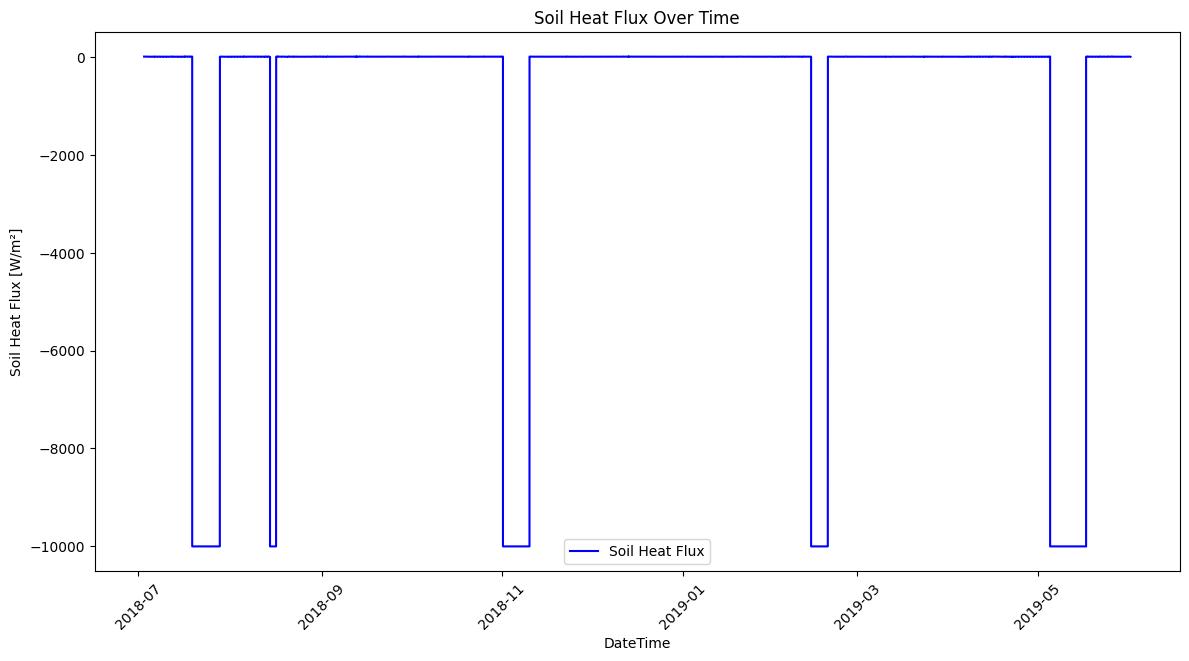

In [ ]:
sheet_data['DateTime'] = pd.to_datetime(sheet_data['DateTime'])
plt.figure(figsize=(14, 7))
plt.plot(sheet_data['DateTime'], sheet_data['SoilHeatFlux_DiffVolt1'], label='Soil Heat Flux', color='blue')
plt.title('Soil Heat Flux Over Time')
plt.xlabel('DateTime')
plt.ylabel('Soil Heat Flux [W/m²]')
plt.xticks(rotation=45)
plt.legend()
plt.show()

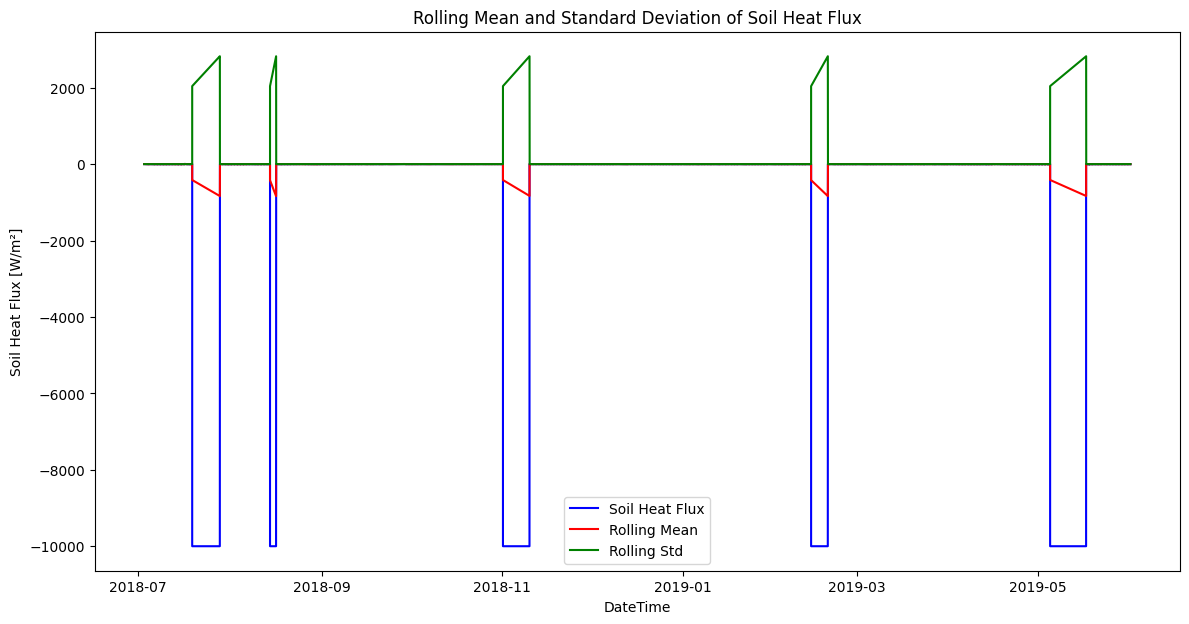

In [ ]:
sheet_data['DateTime'] = pd.to_datetime(sheet_data['DateTime'])

# Calculate rolling mean and standard deviation with a window size of 24
rolling_mean = sheet_data['SoilHeatFlux_DiffVolt1'].rolling(window=24).mean()
rolling_std = sheet_data['SoilHeatFlux_DiffVolt1'].rolling(window=24).std()

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(sheet_data['DateTime'], sheet_data['SoilHeatFlux_DiffVolt1'], label='Soil Heat Flux', color='blue')
plt.plot(sheet_data['DateTime'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(sheet_data['DateTime'], rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean and Standard Deviation of Soil Heat Flux')
plt.xlabel('DateTime')
plt.ylabel('Soil Heat Flux [W/m²]')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

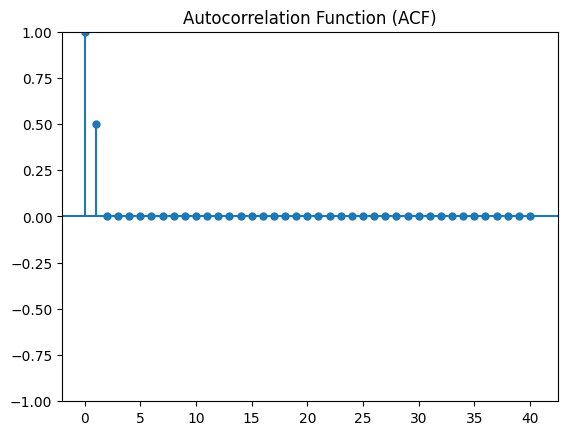

<Figure size 1200x600 with 0 Axes>

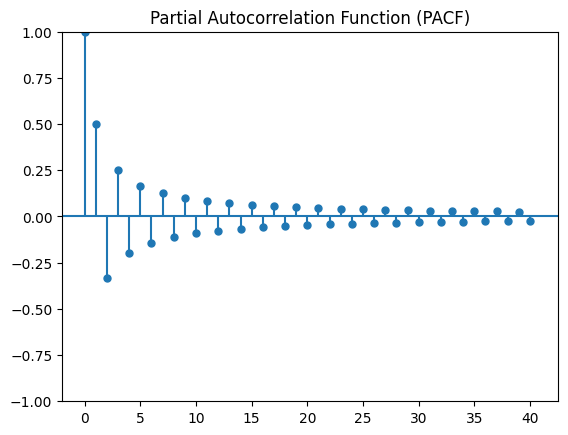

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(sheet_data['SoilHeatFlux_DiffVolt1'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(sheet_data['SoilHeatFlux_DiffVolt1'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1',
       'SoilHeatFlux_DiffVolt2', 'VolSWC_10cm', 'Conductivity_10cm',
       'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm',
       'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour'],
      dtype='object')


In [ ]:
#Dropping columns having 0 as field value
sheet_data.drop(columns=['SoilHeatFlux_DiffVolt2'], inplace=True)

# Display the updated columns to confirm the drop
print("Updated columns:", sheet_data.columns)

Updated columns: Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour'],
      dtype='object')


In [ ]:
missing_values = sheet_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 DateTime                   0
AnalysisRun                0
SoilHeatFlux_DiffVolt1     0
VolSWC_10cm               10
Conductivity_10cm          0
SoilTemp_10cm             10
VolSWC_20cm               10
Conductivity_20cm          0
SoilTemp_20cm             10
VolSWC_40cm               10
Conductivity_40cm          0
SoilTemp_40cm             10
VolSWC_80cm               10
Conductivity_80cm          0
SoilTemp_80cm             10
NET_Radiation             10
Hour                       0
dtype: int64


In [ ]:
# Mean Imputation
sheet_data.fillna(sheet_data.mean(), inplace=True)

# Check if there are still any missing values
print(sheet_data.isnull().sum())

DateTime                  0
AnalysisRun               0
SoilHeatFlux_DiffVolt1    0
VolSWC_10cm               0
Conductivity_10cm         0
SoilTemp_10cm             0
VolSWC_20cm               0
Conductivity_20cm         0
SoilTemp_20cm             0
VolSWC_40cm               0
Conductivity_40cm         0
SoilTemp_40cm             0
VolSWC_80cm               0
Conductivity_80cm         0
SoilTemp_80cm             0
NET_Radiation             0
Hour                      0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sheet_data.drop(columns=['DateTime','SoilHeatFlux_DiffVolt1']))

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour'],
      dtype='object')


In [ ]:
Q1 = sheet_data['SoilHeatFlux_DiffVolt1'].quantile(0.25)
Q3 = sheet_data['SoilHeatFlux_DiffVolt1'].quantile(0.75)
IQR = Q3 - Q1
sheet_data = sheet_data[(sheet_data['SoilHeatFlux_DiffVolt1'] >= (Q1 - 1.5 * IQR)) & (sheet_data['SoilHeatFlux_DiffVolt1'] <= (Q3 + 1.5 * IQR))]

In [ ]:
print(sheet_data.head())

             DateTime  AnalysisRun  SoilHeatFlux_DiffVolt1  VolSWC_10cm  \
0 2018-07-02 23:52:00         1489                    1.34        0.203   
1 2018-07-02 23:53:00         1490                    1.34        0.203   
2 2018-07-02 23:54:00         1491                    1.34        0.204   
3 2018-07-02 23:55:00         1492                    1.34        0.203   
4 2018-07-02 23:56:00         1493                    1.34        0.203   

   Conductivity_10cm  SoilTemp_10cm  VolSWC_20cm  Conductivity_20cm  \
0               59.7          31.99        0.249               41.1   
1               59.7          31.98        0.249               41.1   
2               58.5          31.95        0.249               40.5   
3               59.6          31.96        0.249               41.2   
4               59.6          31.93        0.249               41.2   

   SoilTemp_20cm  VolSWC_40cm  Conductivity_40cm  SoilTemp_40cm  VolSWC_80cm  \
0          32.99        0.225             

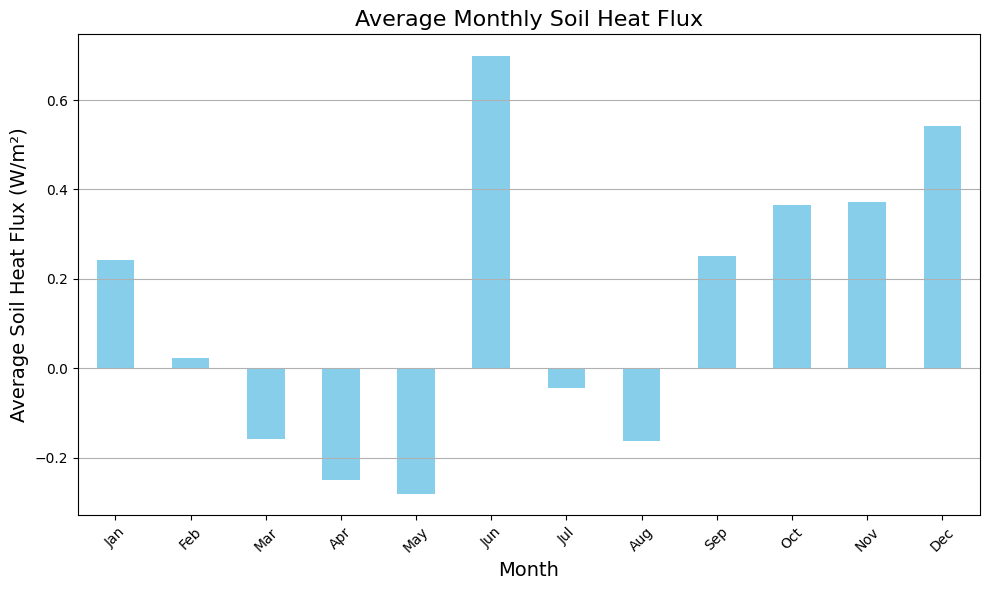

Highest Average Soil Heat Flux Month: Jun with an average flux of: 0.6979470198675497
Lowest Average Soil Heat Flux Month: May with an average flux of: -0.28002573500740857


In [ ]:

# Assuming 'DateTime' is the column with your date/time data
sheet_data['DateTime'] = pd.to_datetime(sheet_data['DateTime'])  # Convert to datetime if not already

# Create a new column for Month without dropping DateTime
sheet_data['Month'] = sheet_data['DateTime'].dt.month

# Group by month and calculate the mean soil heat flux
monthly_avg_flux = sheet_data.groupby('Month')['SoilHeatFlux_DiffVolt1'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_avg_flux.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Soil Heat Flux', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Soil Heat Flux (W/m²)', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identify the highest and lowest months
highest_month = monthly_avg_flux.idxmax()  # Month with the highest average flux
lowest_month = monthly_avg_flux.idxmin()    # Month with the lowest average flux

# Print the results
print("Highest Average Soil Heat Flux Month:", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][highest_month - 1],
      "with an average flux of:", monthly_avg_flux.max())
print("Lowest Average Soil Heat Flux Month:", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][lowest_month - 1],
      "with an average flux of:", monthly_avg_flux.min())

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


([<matplotlib.axis.XTick at 0x7dd345720250>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

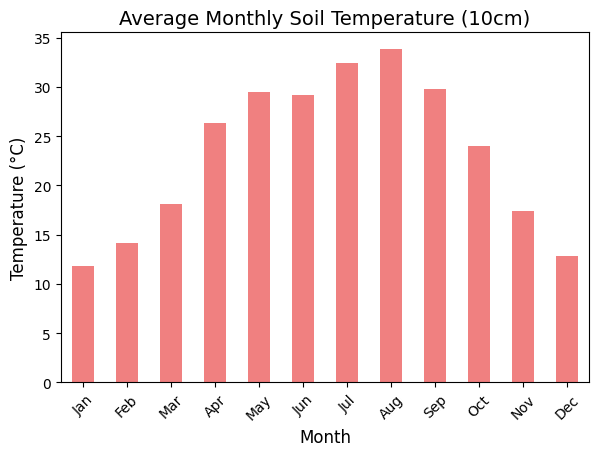

In [ ]:
monthly_avg_temp = sheet_data.groupby('Month')['SoilTemp_10cm'].mean()
monthly_avg_swc = sheet_data.groupby('Month')['VolSWC_10cm'].mean()
monthly_avg_conductivity = sheet_data.groupby('Month')['Conductivity_10cm'].mean()
monthly_avg_radiation = sheet_data.groupby('Month')['NET_Radiation'].mean()

# Plotting
plt.figure(figsize=(15, 10))

# Soil Temperature
plt.subplot(2, 2, 1)
monthly_avg_temp.plot(kind='bar', color='lightcoral')
plt.title('Average Monthly Soil Temperature (10cm)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)


In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


([<matplotlib.axis.XTick at 0x7dd345663190>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

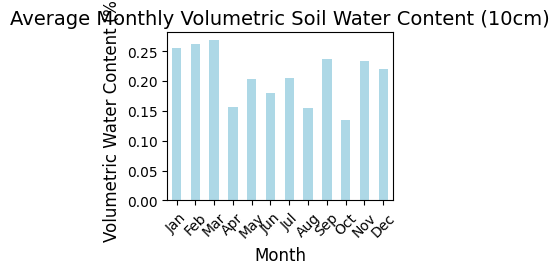

In [ ]:
# Volumetric Soil Water Content
plt.subplot(2, 2, 2)
monthly_avg_swc.plot(kind='bar', color='lightblue')
plt.title('Average Monthly Volumetric Soil Water Content (10cm)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Volumetric Water Content (%)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)


In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


([<matplotlib.axis.XTick at 0x7dd3454fbaf0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

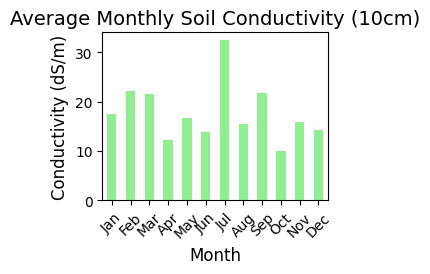

In [ ]:
# Soil Conductivity
plt.subplot(2, 2, 3)
monthly_avg_conductivity.plot(kind='bar', color='lightgreen')
plt.title('Average Monthly Soil Conductivity (10cm)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Conductivity (dS/m)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


([<matplotlib.axis.XTick at 0x7dd345597820>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

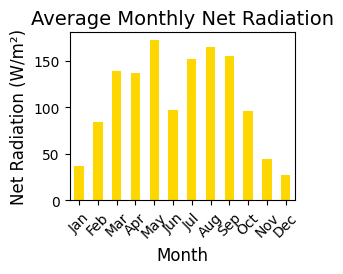

In [ ]:
# Net Radiation
plt.subplot(2, 2, 4)
monthly_avg_radiation.plot(kind='bar', color='gold')
plt.title('Average Monthly Net Radiation', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Radiation (W/m²)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


In [ ]:
# Identify the highest and lowest months for each variable
def print_highest_and_lowest(monthly_avg, variable_name):
    highest_month = monthly_avg.idxmax()
    lowest_month = monthly_avg.idxmin()
    print(f"Highest Average {variable_name} Month: {['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][highest_month - 1]} with an average of: {monthly_avg.max()}")
    print(f"Lowest Average {variable_name} Month: {['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][lowest_month - 1]} with an average of: {monthly_avg.min()}")

# Print results for each variable
print_highest_and_lowest(monthly_avg_temp, "Soil Temperature (10cm)")
print_highest_and_lowest(monthly_avg_swc, "Volumetric Soil Water Content (10cm)")
print_highest_and_lowest(monthly_avg_conductivity, "Soil Conductivity (10cm)")
print_highest_and_lowest(monthly_avg_radiation, "Net Radiation")

Highest Average Soil Temperature (10cm) Month: Aug with an average of: 33.83951993088979
Lowest Average Soil Temperature (10cm) Month: Jan with an average of: 11.85785430107527
Highest Average Volumetric Soil Water Content (10cm) Month: Mar with an average of: 0.26810197132616487
Lowest Average Volumetric Soil Water Content (10cm) Month: Oct with an average of: 0.1341624551971326
Highest Average Soil Conductivity (10cm) Month: Jul with an average of: 32.37301581353519
Lowest Average Soil Conductivity (10cm) Month: Oct with an average of: 10.075633960573477
Highest Average Net Radiation Month: May with an average of: 171.65446241129223
Lowest Average Net Radiation Month: Dec with an average of: 27.42723136200717


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have already loaded your dataset
# and it is stored in a DataFrame named 'sheet_data'

# Convert all columns except 'DateTime' to numeric data types
numeric_cols = sheet_data.columns[sheet_data.dtypes != 'datetime64[ns]']
sheet_data[numeric_cols] = sheet_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Define the features (X) and target variable (y)
X = sheet_data[numeric_cols].drop(columns=['SoilHeatFlux_DiffVolt1'])  # Replace with your target variable name
y = sheet_data['SoilHeatFlux_DiffVolt1']

# 1. Univariate Selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
univariate_scores = selector.scores_

# 2. Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)
rfe_ranking = rfe.ranking_

# 3. Feature Importance from Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

# Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Feature': X.columns,
    'Univariate Score': univariate_scores,
    'RFE Ranking': rfe_ranking,
    'Random Forest Importance': feature_importances
})

# Sort the results for better readability
results = results.sort_values(by='Univariate Score', ascending=False)

# Display the results
print(results)

              Feature  Univariate Score  RFE Ranking  Random Forest Importance
13      NET_Radiation     742449.811744           14                  0.614073
3       SoilTemp_10cm      25030.535279            4                  0.033136
14               Hour      20700.726411            8                  0.251607
15              Month       3776.481336           11                  0.022935
6       SoilTemp_20cm       2843.788278            3                  0.003856
8   Conductivity_40cm       1455.393120            9                  0.006154
0         AnalysisRun       1439.964517           16                  0.023356
2   Conductivity_10cm        881.052274           13                  0.004155
12      SoilTemp_80cm        617.134363            7                  0.008936
4         VolSWC_20cm        430.883746            1                  0.002335
7         VolSWC_40cm        324.606098           15                  0.002415
9       SoilTemp_40cm        306.159926            5

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


In [ ]:

# Sort and display features based on Univariate Score
print("\nFeatures sorted by Univariate Score:")
print(results.sort_values(by='Univariate Score', ascending=False)[['Feature', 'Univariate Score']])

# Sort and display features based on RFE Ranking
print("\nFeatures sorted by RFE Ranking (1 is the best):")
print(results.sort_values(by='RFE Ranking')[['Feature', 'RFE Ranking']])

# Sort and display features based on Random Forest Importance
print("\nFeatures sorted by Random Forest Importance:")
print(results.sort_values(by='Random Forest Importance', ascending=False)[['Feature', 'Random Forest Importance']])


Features sorted by Univariate Score:
              Feature  Univariate Score
13      NET_Radiation     742449.811744
3       SoilTemp_10cm      25030.535279
14               Hour      20700.726411
15              Month       3776.481336
6       SoilTemp_20cm       2843.788278
8   Conductivity_40cm       1455.393120
0         AnalysisRun       1439.964517
2   Conductivity_10cm        881.052274
12      SoilTemp_80cm        617.134363
4         VolSWC_20cm        430.883746
7         VolSWC_40cm        324.606098
9       SoilTemp_40cm        306.159926
1         VolSWC_10cm        221.939847
11  Conductivity_80cm        200.306235
10        VolSWC_80cm         99.576913
5   Conductivity_20cm          0.077895

Features sorted by RFE Ranking (1 is the best):
              Feature  RFE Ranking
4         VolSWC_20cm            1
1         VolSWC_10cm            2
6       SoilTemp_20cm            3
3       SoilTemp_10cm            4
9       SoilTemp_40cm            5
10        VolSWC_80cm  

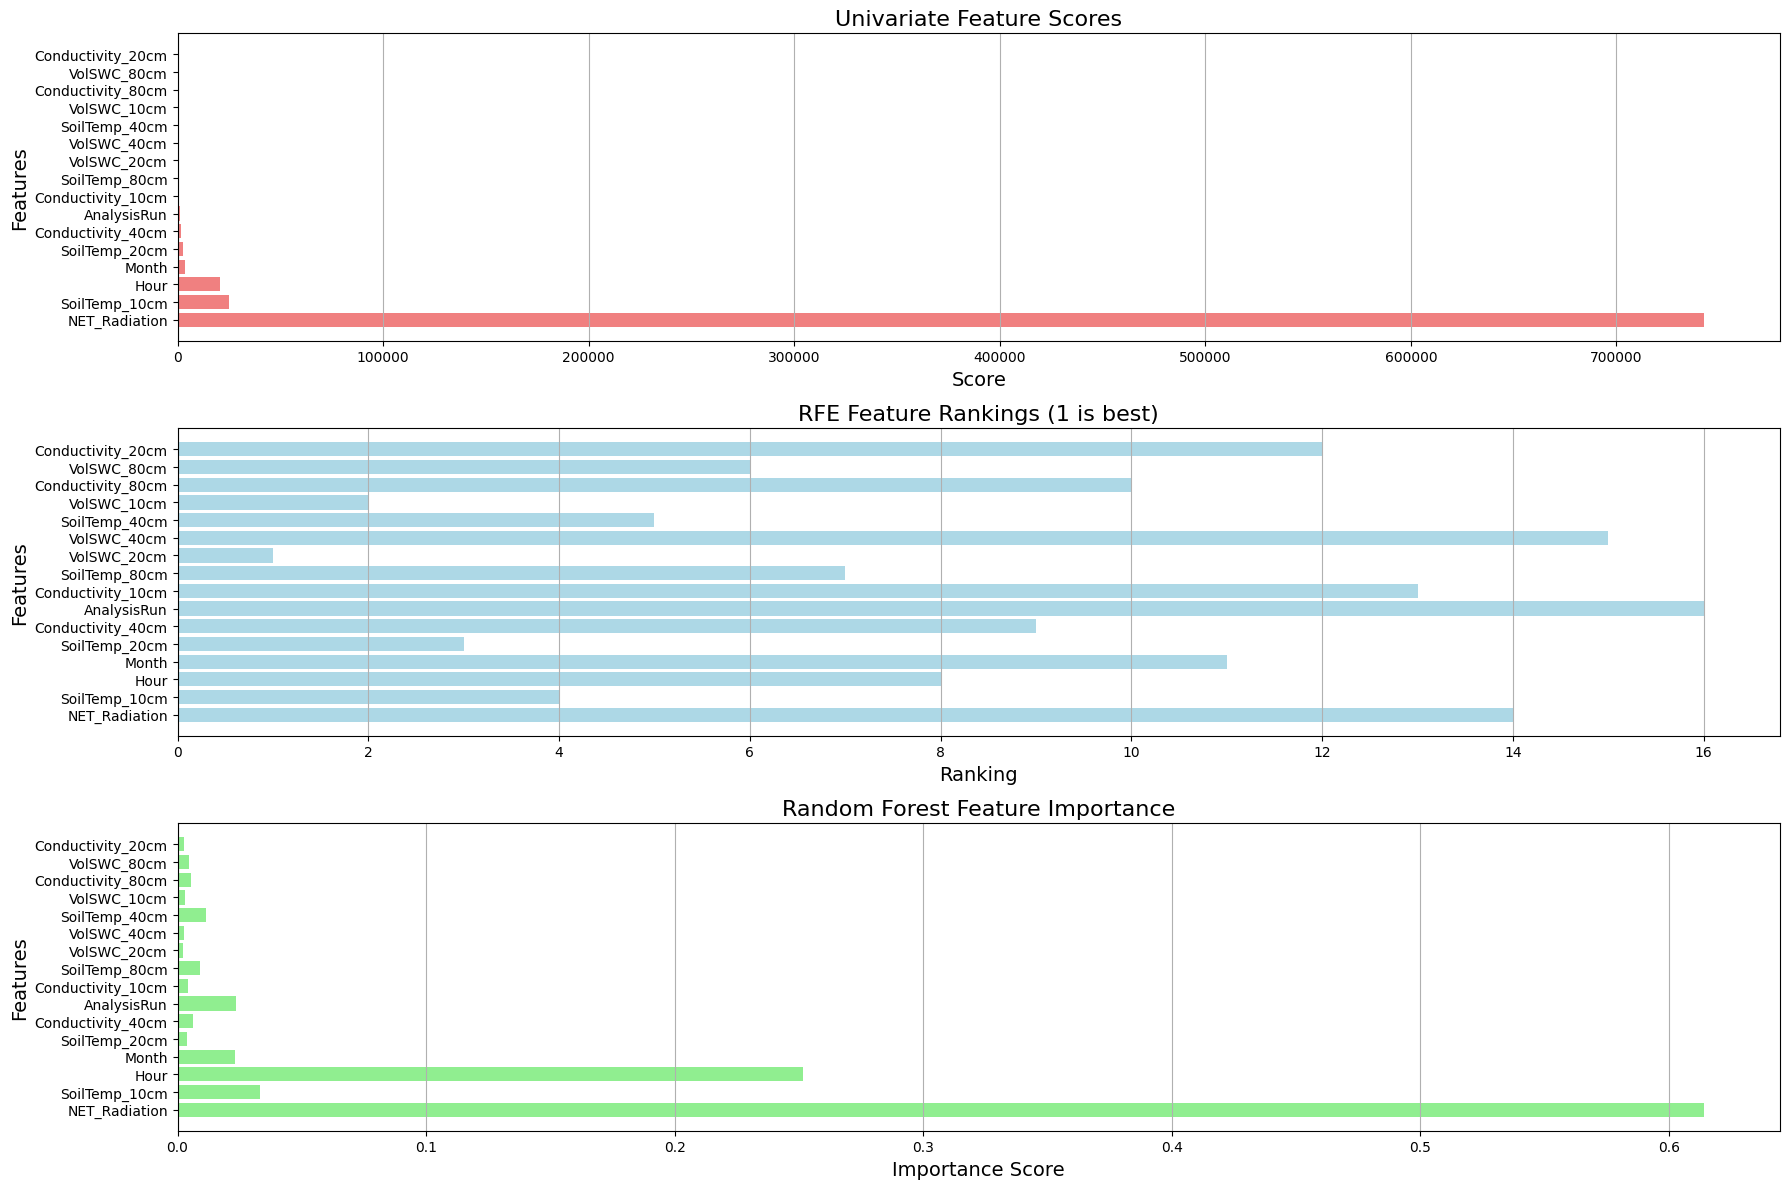

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure for plotting
plt.figure(figsize=(18, 12))

# 1. Plot Univariate Scores
plt.subplot(3, 1, 1)
plt.barh(results['Feature'], results['Univariate Score'], color='lightcoral')
plt.title('Univariate Feature Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x')

# 2. Plot RFE Rankings
plt.subplot(3, 1, 2)
plt.barh(results['Feature'], results['RFE Ranking'], color='lightblue')
plt.title('RFE Feature Rankings (1 is best)', fontsize=16)
plt.xlabel('Ranking', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x')

# 3. Plot Random Forest Importance
plt.subplot(3, 1, 3)
plt.barh(results['Feature'], results['Random Forest Importance'], color='lightgreen')
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming you have the 'results' DataFrame from the previous feature selection code

# Consolidate the results
print("Consolidated Feature Selection Results:")
print(results)

# Analyze the results
print("\nAnalysis:")

# Identify the best features based on Univariate Score
best_univariate_features = results.nlargest(5, 'Univariate Score')['Feature']
print(f"\nBest Features based on Univariate Score:\n{best_univariate_features}")

# Identify the best features based on RFE Ranking
best_rfe_features = results.nsmallest(5, 'RFE Ranking')['Feature']
print(f"\nBest Features based on RFE Ranking:\n{best_rfe_features}")

# Identify the best features based on Random Forest Importance
best_rf_features = results.nlargest(5, 'Random Forest Importance')['Feature']
print(f"\nBest Features based on Random Forest Importance:\n{best_rf_features}")

# Identify the features to ignore based on low importance
ignore_features = results[results['Random Forest Importance'] < 0.01]['Feature']
print(f"\nFeatures to Consider Ignoring:\n{ignore_features}")

# Provide recommendations
print("\nRecommendations:")

# Recommended best features
recommended_features = list(set(best_univariate_features) | set(best_rfe_features) | set(best_rf_features))
print(recommended_features)

# Features to ignore
print(f"\nConsider ignoring the following features:\n{ignore_features}")

Consolidated Feature Selection Results:
              Feature  Univariate Score  RFE Ranking  Random Forest Importance
13      NET_Radiation     742449.811744           14                  0.614073
3       SoilTemp_10cm      25030.535279            4                  0.033136
14               Hour      20700.726411            8                  0.251607
15              Month       3776.481336           11                  0.022935
6       SoilTemp_20cm       2843.788278            3                  0.003856
8   Conductivity_40cm       1455.393120            9                  0.006154
0         AnalysisRun       1439.964517           16                  0.023356
2   Conductivity_10cm        881.052274           13                  0.004155
12      SoilTemp_80cm        617.134363            7                  0.008936
4         VolSWC_20cm        430.883746            1                  0.002335
7         VolSWC_40cm        324.606098           15                  0.002415
9       Soil

In [ ]:
print(sheet_data.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


In [ ]:
# Save the preprocessed dataset to a CSV file in the working directory
sheet_data.to_csv('/kaggle/working/preprocessed_data1.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
sheet_data = pd.read_csv('/kaggle/working/preprocessed_data1.csv')

# Define the features and target variable
X = sheet_data.drop(columns=['SoilHeatFlux_DiffVolt1'])  # Features
y = sheet_data['SoilHeatFlux_DiffVolt1']  # Target variable

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save the datasets
X_train.to_csv('/kaggle/working/X_train1.csv', index=False)
y_train.to_csv('/kaggle/working/y_train1.csv', index=False)

X_val.to_csv('/kaggle/working/X_val1.csv', index=False)
y_val.to_csv('/kaggle/working/y_val1.csv', index=False)

X_test.to_csv('/kaggle/working/X_test1.csv', index=False)
y_test.to_csv('/kaggle/working/y_test1.csv', index=False)

In [ ]:
conda install -c conda-forge darts

Retrieving notices: ...working... done
^C

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!conda update conda


Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e1c3c20d6c0>: Failed to resolve 'repo.anaconda.com' ([Errno -3] Temporary failure in name resolution)")': /pkgs/main/linux-64/repodata.json.zst

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e1c3c20d840>: Failed to resolve 'conda.anaconda.org' ([Errno -3] Temporary failure in name resolution)")': /conda-forge/linux-64/repodata.json.zst

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e1c3c20ed40>: Failed to resolve 'conda.anaconda.org' ([Errno -3] Temporary failure in name resolu

In [ ]:
# Install Darts and dependencies
!pip install darts --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 198.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 201.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 198.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 157.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 156.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 173.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller, Scaler
from darts.models import TCNModel
from darts.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('/kaggle/working/preprocessed_data1.csv')

print(f"Original DataFrame length: {len(df)}")


Original DataFrame length: 417885


In [ ]:
print(df.columns)

Index(['DateTime', 'AnalysisRun', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler



# Ensure DateTime column is the correct datetime type and set as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Resample to fill missing hours, if necessary
df = df.resample('H').mean()

# Identify categorical features to exclude from scaling
categorical_features = ['Hour', 'Month', 'AnalysisRun']

# Create a TimeSeries object with specified frequency, excluding categorical features
numerical_df = df.drop(columns=categorical_features)
series = TimeSeries.from_dataframe(numerical_df, freq='H')

# Split the data into training, validation, and test sets
train_size = int(len(series) * 0.7)
val_size = int(len(series) * 0.15)

train = series[:train_size]
val = series[train_size:train_size + val_size]
test = series[train_size + val_size:]

print(f"Train length: {len(train)}")
print(f"Validation length: {len(val)}")
print(f"Test length: {len(test)}")

# Standardize the data
scaler = Scaler()
train_transformed = scaler.fit_transform(train)
val_transformed = scaler.transform(val)
test_transformed = scaler.transform(test)

# Convert TimeSeries back to DataFrame for reconstruction
train_df = train.pd_dataframe()
val_df = val.pd_dataframe()
test_df = test.pd_dataframe()

# Add back the categorical features
train_df[categorical_features] = df[categorical_features].iloc[:train_size].values
val_df[categorical_features] = df[categorical_features].iloc[train_size:train_size + val_size].values
test_df[categorical_features] = df[categorical_features].iloc[train_size + val_size:].values

# Ensure DateTime is preserved
train_df['DateTime'] = train_df.index
val_df['DateTime'] = val_df.index
test_df['DateTime'] = test_df.index

# Print transformed lengths
print(f"Transformed train length: {len(train_transformed)}")
print(f"Transformed validation length: {len(val_transformed)}")
print(f"Transformed test length: {len(test_transformed)}")

# Save to CSV files in the working directory
train_df.to_csv('/kaggle/working/train_transformed5.csv', index=True)
val_df.to_csv('/kaggle/working/val_transformed5.csv', index=True)
test_df.to_csv('/kaggle/working/test_transformed5.csv', index=True)

print("Transformed datasets saved as CSV files.")

/tmp/ipykernel_36/2484989397.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()


Train length: 5602
Validation length: 1200
Test length: 1202
Transformed train length: 5602
Transformed validation length: 1200
Transformed test length: 1202
Transformed datasets saved as CSV files.


In [ ]:
import pandas as pd

# Load your transformed datasets
train_df = pd.read_csv('/kaggle/working/train_transformed5.csv')
val_df = pd.read_csv('/kaggle/working/val_transformed5.csv',)
test_df = pd.read_csv('/kaggle/working/test_transformed5.csv',)

# Print columns before removing the last column
print("Train DataFrame columns before removing last column:")
print(train_df.columns.tolist())
print("\nValidation DataFrame columns before removing last column:")
print(val_df.columns.tolist())
print("\nTest DataFrame columns before removing last column:")
print(test_df.columns.tolist())



Train DataFrame columns before removing last column:
['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm', 'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm', 'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month', 'AnalysisRun', 'DateTime.1']

Validation DataFrame columns before removing last column:
['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm', 'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm', 'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month', 'AnalysisRun', 'DateTime.1']

Test DataFrame columns before removing last column:
['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm', 'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_8

In [ ]:
print(train_df.columns)

Index(['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month',
       'AnalysisRun', 'DateTime.1'],
      dtype='object')


In [ ]:

# Print columns before removing the last column
print("Train DataFrame columns before removing duplicates:")
print(train_df.columns.tolist())
print("\nValidation DataFrame columns before removing duplicates:")
print(val_df.columns.tolist())
print("\nTest DataFrame columns before removing duplicates:")
print(test_df.columns.tolist())

# Remove the 'DateTime.1' column if it exists
for df in [train_df, val_df, test_df]:
    if 'DateTime.1' in df.columns:
        df.drop(columns=['DateTime.1'], inplace=True)

# Remove the last column from each DataFrame
train_df = train_df.iloc[:, :-1]  # Remove the last column from train DataFrame
val_df = val_df.iloc[:, :-1]      # Remove the last column from validation DataFrame
test_df = test_df.iloc[:, :-1]    # Remove the last column from test DataFrame

# Print columns after removing duplicates and last column
print("\nTrain DataFrame columns after removing duplicates and last column:")
print(train_df.columns.tolist())
print("\nValidation DataFrame columns after removing duplicates and last column:")
print(val_df.columns.tolist())
print("\nTest DataFrame columns after removing duplicates and last column:")
print(test_df.columns.tolist())

# Save the modified DataFrames back to CSV files
train_df.to_csv('/kaggle/working/train_transformed_final.csv', index=True)
val_df.to_csv('/kaggle/working/val_transformed_final.csv', index=True)
test_df.to_csv('/kaggle/working/test_transformed_final.csv', index=True)

print("Last columns removed and modified datasets saved as new CSV files.")

Train DataFrame columns before removing duplicates:
['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm', 'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm', 'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month', 'AnalysisRun', 'DateTime.1']

Validation DataFrame columns before removing duplicates:
['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm', 'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm', 'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month', 'AnalysisRun', 'DateTime.1']

Test DataFrame columns before removing duplicates:
['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm', 'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm', 'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm', 'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm

In [ ]:
print("Train data sample:", train_df.head())
print("Validation data sample:", val_df.head())

Train data sample:               DateTime  SoilHeatFlux_DiffVolt1  VolSWC_10cm  \
0  2018-07-02 23:00:00                1.467500     0.203375   
1  2018-07-03 00:00:00                1.801833     0.202400   
2  2018-07-03 01:00:00                1.986000     0.203200   
3  2018-07-03 02:00:00                2.020000     0.204067   
4  2018-07-03 03:00:00                1.889667     0.204317   

   Conductivity_10cm  SoilTemp_10cm  VolSWC_20cm  Conductivity_20cm  \
0          59.325000      31.931250     0.249000          41.000000   
1          58.985000      31.427500     0.249083          40.881667   
2          58.625000      30.765167     0.248400          40.621667   
3          58.310000      30.194000     0.248417          40.343333   
4          58.018333      29.801333     0.248167          40.076667   

   SoilTemp_20cm  VolSWC_40cm  Conductivity_40cm  SoilTemp_40cm  VolSWC_80cm  \
0      32.968750     0.225000          24.012500      32.760000        0.185   
1      32.81650

In [ ]:

# Check for NaNs in training data
print("Check for NaNs in training data:")
print(train_df.isna().sum())

# Check for NaNs in validation data
print("Check for NaNs in validation data:")
print(val_df.isna().sum())


Check for NaNs in training data:
DateTime                    0
SoilHeatFlux_DiffVolt1    649
VolSWC_10cm               649
Conductivity_10cm         649
SoilTemp_10cm             649
VolSWC_20cm               649
Conductivity_20cm         649
SoilTemp_20cm             649
VolSWC_40cm               649
Conductivity_40cm         649
SoilTemp_40cm             649
VolSWC_80cm               649
Conductivity_80cm         649
SoilTemp_80cm             649
NET_Radiation             649
Hour                      649
Month                     649
dtype: int64
Check for NaNs in validation data:
DateTime                  0
SoilHeatFlux_DiffVolt1    8
VolSWC_10cm               8
Conductivity_10cm         8
SoilTemp_10cm             8
VolSWC_20cm               8
Conductivity_20cm         8
SoilTemp_20cm             8
VolSWC_40cm               8
Conductivity_40cm         8
SoilTemp_40cm             8
VolSWC_80cm               8
Conductivity_80cm         8
SoilTemp_80cm             8
NET_Radiation    

In [ ]:
train_df.iloc[:, :-1] = train_df.iloc[:, :-1].fillna(train_df.mean(numeric_only=True))
val_df.iloc[:, :-1] = val_df.iloc[:, :-1].fillna(val_df.mean(numeric_only=True))
test_df.iloc[:, :-1] = test_df.iloc[:, :-1].fillna(test_df.mean(numeric_only=True))

In [ ]:
print(train_df.columns)

Index(['DateTime', 'SoilHeatFlux_DiffVolt1', 'VolSWC_10cm',
       'Conductivity_10cm', 'SoilTemp_10cm', 'VolSWC_20cm',
       'Conductivity_20cm', 'SoilTemp_20cm', 'VolSWC_40cm',
       'Conductivity_40cm', 'SoilTemp_40cm', 'VolSWC_80cm',
       'Conductivity_80cm', 'SoilTemp_80cm', 'NET_Radiation', 'Hour', 'Month'],
      dtype='object')


In [ ]:

# Check for NaNs in training data
print("Check for NaNs in training data:")
print(train_df.isna().sum())

# Check for NaNs in validation data
print("Check for NaNs in validation data:")
print(val_df.isna().sum())


Check for NaNs in training data:
DateTime                    0
SoilHeatFlux_DiffVolt1      0
VolSWC_10cm                 0
Conductivity_10cm           0
SoilTemp_10cm               0
VolSWC_20cm                 0
Conductivity_20cm           0
SoilTemp_20cm               0
VolSWC_40cm                 0
Conductivity_40cm           0
SoilTemp_40cm               0
VolSWC_80cm                 0
Conductivity_80cm           0
SoilTemp_80cm               0
NET_Radiation               0
Hour                        0
Month                     649
dtype: int64
Check for NaNs in validation data:
DateTime                  0
SoilHeatFlux_DiffVolt1    0
VolSWC_10cm               0
Conductivity_10cm         0
SoilTemp_10cm             0
VolSWC_20cm               0
Conductivity_20cm         0
SoilTemp_20cm             0
VolSWC_40cm               0
Conductivity_40cm         0
SoilTemp_40cm             0
VolSWC_80cm               0
Conductivity_80cm         0
SoilTemp_80cm             0
NET_Radiation    

In [ ]:
month_mode = train_df['Month'].mode()[0]  # Get the most frequent value
train_df['Month'].fillna(month_mode, inplace=True)
val_df['Month'].fillna(month_mode, inplace=True)
test_df['Month'].fillna(month_mode, inplace=True)

/tmp/ipykernel_36/1107764190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Month'].fillna(month_mode, inplace=True)
/tmp/ipykernel_36/1107764190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:

# Check for NaNs in training data
print("Check for NaNs in training data:")
print(train_df.isna().sum())

# Check for NaNs in validation data
print("Check for NaNs in validation data:")
print(val_df.isna().sum())


Check for NaNs in training data:
DateTime                  0
SoilHeatFlux_DiffVolt1    0
VolSWC_10cm               0
Conductivity_10cm         0
SoilTemp_10cm             0
VolSWC_20cm               0
Conductivity_20cm         0
SoilTemp_20cm             0
VolSWC_40cm               0
Conductivity_40cm         0
SoilTemp_40cm             0
VolSWC_80cm               0
Conductivity_80cm         0
SoilTemp_80cm             0
NET_Radiation             0
Hour                      0
Month                     0
dtype: int64
Check for NaNs in validation data:
DateTime                  0
SoilHeatFlux_DiffVolt1    0
VolSWC_10cm               0
Conductivity_10cm         0
SoilTemp_10cm             0
VolSWC_20cm               0
Conductivity_20cm         0
SoilTemp_20cm             0
VolSWC_40cm               0
Conductivity_40cm         0
SoilTemp_40cm             0
VolSWC_80cm               0
Conductivity_80cm         0
SoilTemp_80cm             0
NET_Radiation             0
Hour                   

/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)
/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Last time: 2019-02-21 08:00:00, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

Forecast for target variable 'SoilHeatFlux_DiffVolt1':
2019-02-21 09:00:00   -0.491649
2019-02-21 10:00:00   -0.795636
2019-02-21 11:00:00   -1.138284
2019-02-21 12:00:00   -1.104678
2019-02-21 13:00:00   -0.882070
                         ...   
2019-03-08 09:00:00   -0.297439
2019-03-08 10:00:00   -0.290096
2019-03-08 11:00:00   -0.275569
2019-03-08 12:00:00   -0.246521
2019-03-08 13:00:00   -0.235243
Freq: h, Length: 365, dtype: float64


/tmp/ipykernel_36/1110177309.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')


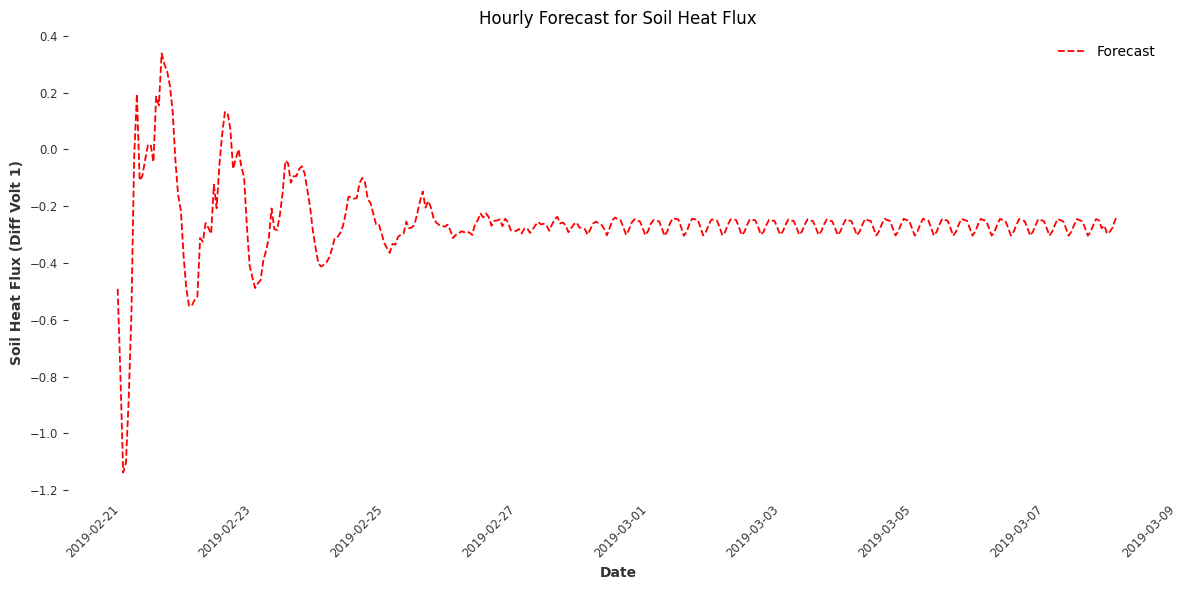

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel

# Assuming train_df, val_df, and test_df are your existing DataFrames
# Ensure the 'DateTime' column is in datetime format and set as index
for df in [train_df, val_df, test_df]:
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df.set_index('DateTime', inplace=True)

# Select only the relevant numeric features for training
features = ['Month', 'VolSWC_20cm', 'Hour',
            'SoilTemp_10cm', 'VolSWC_10cm', 'SoilTemp_40cm',
            'NET_Radiation', 'SoilTemp_20cm', 'SoilHeatFlux_DiffVolt1']

# Create TimeSeries from the selected features for training and validation sets
train_transformed = TimeSeries.from_dataframe(train_df[features], freq='H')
val_transformed = TimeSeries.from_dataframe(val_df[features], freq='H')

# Initialize the model
model = TCNModel(
    input_chunk_length=30,
    output_chunk_length=7,
    n_epochs=10,
    dropout=0.1,
    dilation_base=2,
    weight_norm=False,
    kernel_size=3,
    num_filters=8,
    random_state=0
)

# Fit the model
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True
)

# Perform forecasting
forecast = model.predict(n=365)

# Extract and print forecast for the target variable alone
target_variable_name = 'SoilHeatFlux_DiffVolt1'
forecast_df = forecast.pd_dataframe()

# Check the type and value of last_time
last_time = train_transformed.end_time()  # Get the last time from the training series
print(f"Last time: {last_time}, Type: {type(last_time)}")  # Debugging output

# Ensure last_time is a datetime object
if isinstance(last_time, pd.Timestamp):
    # Create a new forecast index starting from the last time
    forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')
else:
    raise TypeError("last_time is not a valid datetime object. It is of type: {}".format(type(last_time)))

# Create a Series for the forecast with the new index
forecast_target = pd.Series(forecast_df[target_variable_name].values, index=forecast_index)

print(f"\nForecast for target variable '{target_variable_name}':")
print(forecast_target)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_target.index, forecast_target, label='Forecast', color='red', linestyle='--')
plt.title('Hourly Forecast for Soil Heat Flux')
plt.xlabel('Date')
plt.ylabel('Soil Heat Flux (Diff Volt 1)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Axes(0.125,0.11;0.775x0.77)


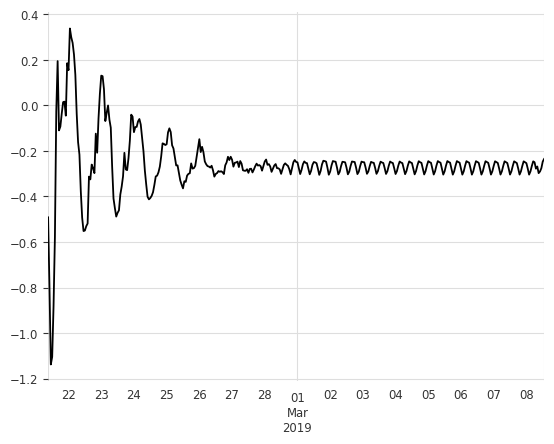

In [ ]:
print(forecast_target.plot())

In [ ]:
# Print model details and summary
print(model)


TCNModel(num_filters=8, dropout=0.1, input_chunk_length=30, output_chunk_length=7, n_epochs=10, random_state=0)


/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)
/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Last time: 2019-02-21 08:00:00, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

Forecast for target variable 'SoilHeatFlux_DiffVolt1':
2019-02-21 09:00:00   -0.208330
2019-02-21 10:00:00   -0.499322
2019-02-21 11:00:00   -0.845840
2019-02-21 12:00:00   -0.836761
2019-02-21 13:00:00   -0.613233
                         ...   
2019-03-08 09:00:00    0.494383
2019-03-08 10:00:00    0.409656
2019-03-08 11:00:00    0.268978
2019-03-08 12:00:00   -0.089595
2019-03-08 13:00:00   -0.405387
Freq: h, Length: 365, dtype: float64


/tmp/ipykernel_36/3102286822.py:50: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')


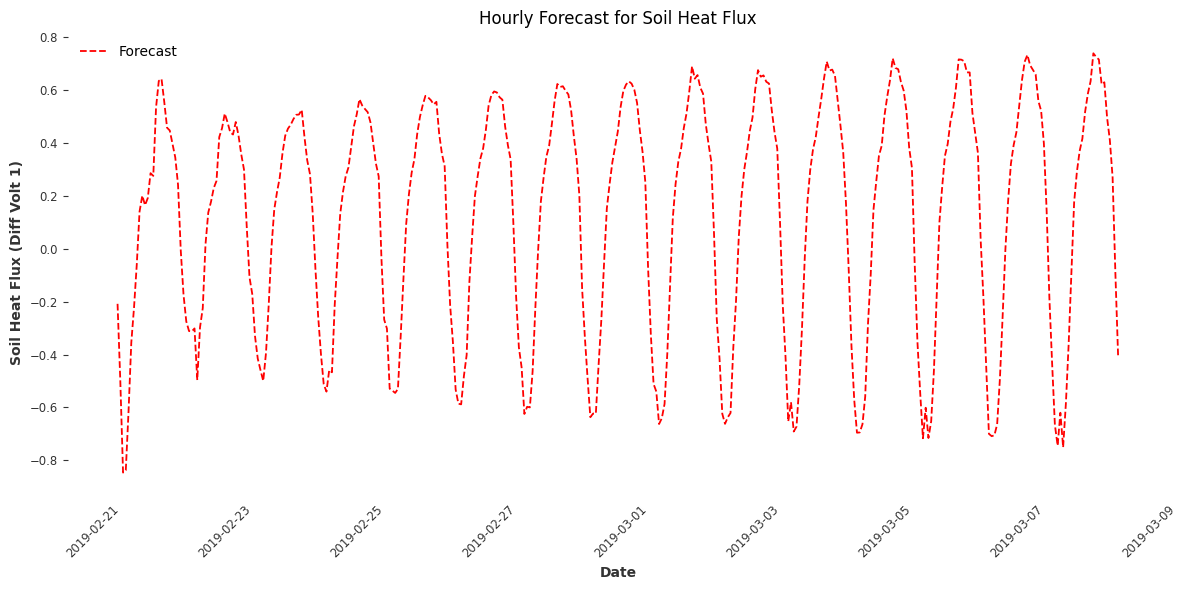

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel


# Select only the relevant numeric features for training
features = ['Month', 'VolSWC_20cm', 'Hour',
            'SoilTemp_10cm', 'VolSWC_10cm', 'SoilTemp_40cm',
            'NET_Radiation', 'SoilTemp_20cm', 'SoilHeatFlux_DiffVolt1']

# Create TimeSeries from the selected features for training and validation sets
train_transformed = TimeSeries.from_dataframe(train_df[features], freq='H')
val_transformed = TimeSeries.from_dataframe(val_df[features], freq='H')

# Initialize the model
model = TCNModel(
    input_chunk_length=30,
    output_chunk_length=7,
    n_epochs=20,
    dropout=0.1,
    dilation_base=2,
    weight_norm=False,
    kernel_size=3,
    num_filters=8,
    random_state=0
)

# Fit the model
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True
)

# Perform forecasting
forecast = model.predict(n=365)

# Extract and print forecast for the target variable alone
target_variable_name = 'SoilHeatFlux_DiffVolt1'
forecast_df = forecast.pd_dataframe()

# Check the type and value of last_time
last_time = train_transformed.end_time()  # Get the last time from the training series
print(f"Last time: {last_time}, Type: {type(last_time)}")  # Debugging output

# Ensure last_time is a datetime object
if isinstance(last_time, pd.Timestamp):
    # Create a new forecast index starting from the last time
    forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')
else:
    raise TypeError("last_time is not a valid datetime object. It is of type: {}".format(type(last_time)))

# Create a Series for the forecast with the new index
forecast_target = pd.Series(forecast_df[target_variable_name].values, index=forecast_index)

print(f"\nForecast for target variable '{target_variable_name}':")
print(forecast_target)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_target.index, forecast_target, label='Forecast', color='red', linestyle='--')
plt.title('Hourly Forecast for Soil Heat Flux')
plt.xlabel('Date')
plt.ylabel('Soil Heat Flux (Diff Volt 1)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Axes(0.125,0.11;0.775x0.77)


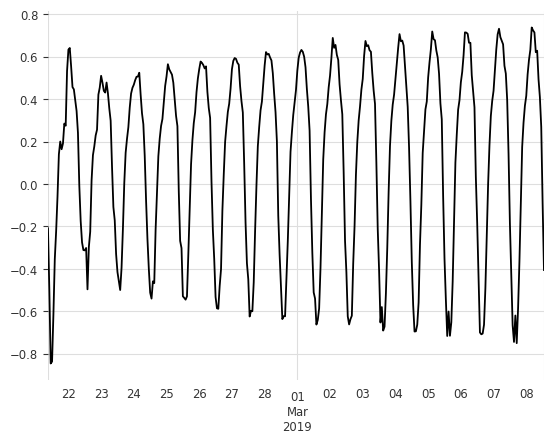

In [ ]:
print(forecast_target.plot())

/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)
/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Last time: 2019-02-21 08:00:00, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

Forecast for target variable 'SoilHeatFlux_DiffVolt1':
2019-02-21 09:00:00   -0.180343
2019-02-21 10:00:00   -0.463576
2019-02-21 11:00:00   -0.792259
2019-02-21 12:00:00   -0.708045
2019-02-21 13:00:00   -0.585827
                         ...   
2019-03-08 09:00:00   -1.300870
2019-03-08 10:00:00   -1.304376
2019-03-08 11:00:00   -1.118859
2019-03-08 12:00:00   -0.998725
2019-03-08 13:00:00   -0.854069
Freq: h, Length: 365, dtype: float64


/tmp/ipykernel_36/672887041.py:49: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')


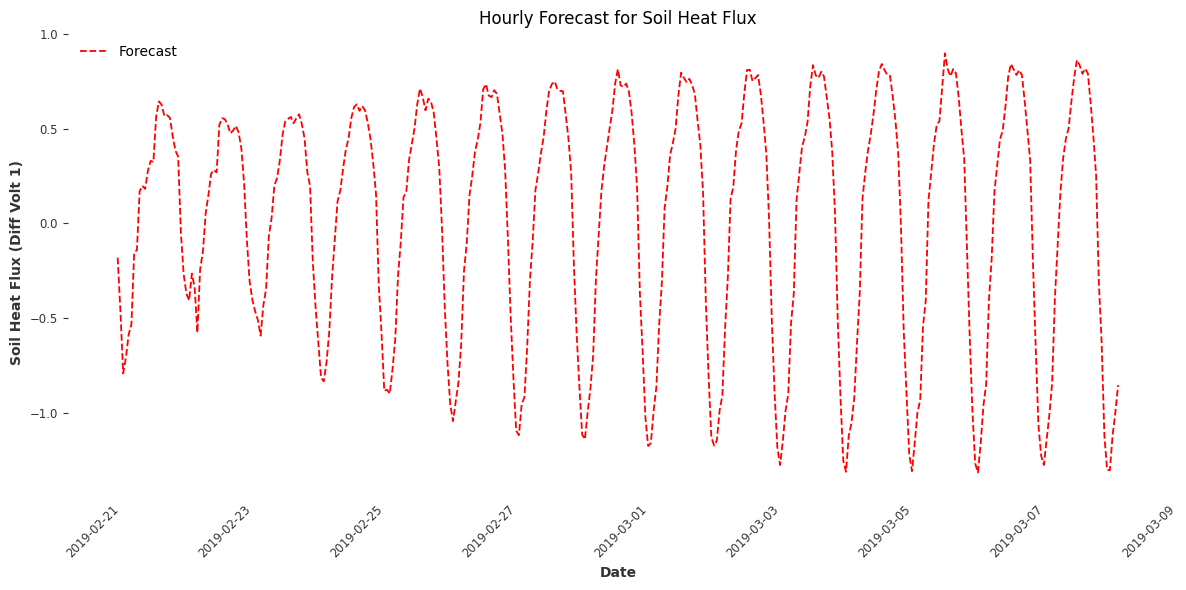

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel

# Select only the relevant numeric features for training
features = ['Month', 'VolSWC_20cm', 'Hour',
            'SoilTemp_10cm', 'VolSWC_10cm', 'SoilTemp_40cm',
            'NET_Radiation', 'SoilTemp_20cm', 'SoilHeatFlux_DiffVolt1']

# Create TimeSeries from the selected features for training and validation sets
train_transformed = TimeSeries.from_dataframe(train_df[features], freq='H')
val_transformed = TimeSeries.from_dataframe(val_df[features], freq='H')

# Initialize the model
model = TCNModel(
    input_chunk_length=30,
    output_chunk_length=7,
    n_epochs=30,
    dropout=0.1,
    dilation_base=2,
    weight_norm=False,
    kernel_size=3,
    num_filters=8,
    random_state=0
)

# Fit the model
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True
)

# Perform forecasting
forecast = model.predict(n=365)

# Extract and print forecast for the target variable alone
target_variable_name = 'SoilHeatFlux_DiffVolt1'
forecast_df = forecast.pd_dataframe()

# Check the type and value of last_time
last_time = train_transformed.end_time()  # Get the last time from the training series
print(f"Last time: {last_time}, Type: {type(last_time)}")  # Debugging output

# Ensure last_time is a datetime object
if isinstance(last_time, pd.Timestamp):
    # Create a new forecast index starting from the last time
    forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')
else:
    raise TypeError("last_time is not a valid datetime object. It is of type: {}".format(type(last_time)))

# Create a Series for the forecast with the new index
forecast_target = pd.Series(forecast_df[target_variable_name].values, index=forecast_index)

print(f"\nForecast for target variable '{target_variable_name}':")
print(forecast_target)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_target.index, forecast_target, label='Forecast', color='red', linestyle='--')
plt.title('Hourly Forecast for Soil Heat Flux')
plt.xlabel('Date')
plt.ylabel('Soil Heat Flux (Diff Volt 1)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Axes(0.125,0.11;0.775x0.77)


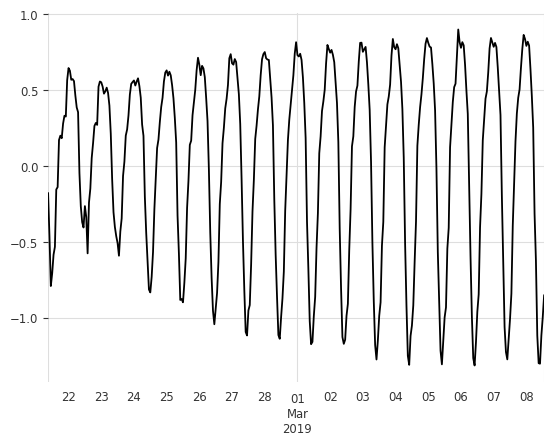

In [ ]:
print(forecast_target.plot())

/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)
/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Last time: 2019-02-21 08:00:00, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

Forecast for target variable 'SoilHeatFlux_DiffVolt1':
2019-02-21 09:00:00   -0.217204
2019-02-21 10:00:00   -0.339195
2019-02-21 11:00:00   -0.564507
2019-02-21 12:00:00   -0.554374
2019-02-21 13:00:00   -0.488792
                         ...   
2019-03-08 09:00:00    0.150310
2019-03-08 10:00:00    0.146305
2019-03-08 11:00:00    0.147989
2019-03-08 12:00:00    0.147227
2019-03-08 13:00:00    0.148902
Freq: h, Length: 365, dtype: float64


/tmp/ipykernel_36/3642911824.py:49: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')


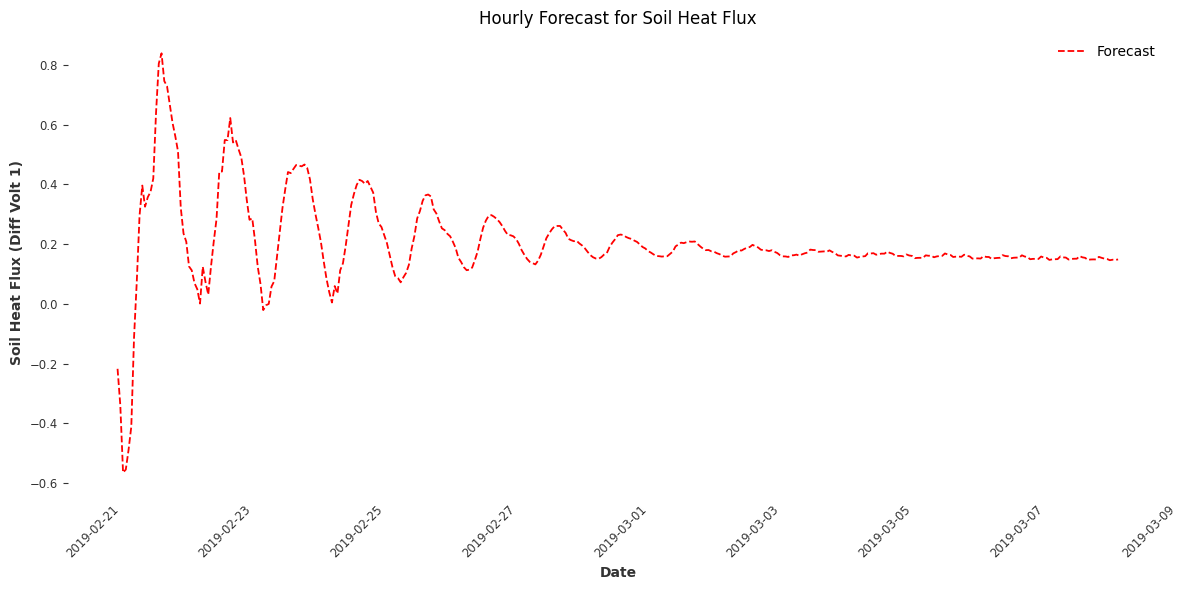

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel

# Select only the relevant numeric features for training
features = ['Month', 'VolSWC_20cm', 'Hour',
            'SoilTemp_10cm', 'VolSWC_10cm', 'SoilTemp_40cm',
            'NET_Radiation', 'SoilTemp_20cm', 'SoilHeatFlux_DiffVolt1']

# Create TimeSeries from the selected features for training and validation sets
train_transformed = TimeSeries.from_dataframe(train_df[features], freq='H')
val_transformed = TimeSeries.from_dataframe(val_df[features], freq='H')

# Initialize the model
model = TCNModel(
    input_chunk_length=40,
    output_chunk_length=7,
    n_epochs=40,
    dropout=0.1,
    dilation_base=2,
    weight_norm=False,
    kernel_size=3,
    num_filters=8,
    random_state=0
)

# Fit the model
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True
)

# Perform forecasting
forecast = model.predict(n=365)

# Extract and print forecast for the target variable alone
target_variable_name = 'SoilHeatFlux_DiffVolt1'
forecast_df = forecast.pd_dataframe()

# Check the type and value of last_time
last_time = train_transformed.end_time()  # Get the last time from the training series
print(f"Last time: {last_time}, Type: {type(last_time)}")  # Debugging output

# Ensure last_time is a datetime object
if isinstance(last_time, pd.Timestamp):
    # Create a new forecast index starting from the last time
    forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')
else:
    raise TypeError("last_time is not a valid datetime object. It is of type: {}".format(type(last_time)))

# Create a Series for the forecast with the new index
forecast_target = pd.Series(forecast_df[target_variable_name].values, index=forecast_index)

print(f"\nForecast for target variable '{target_variable_name}':")
print(forecast_target)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_target.index, forecast_target, label='Forecast', color='red', linestyle='--')
plt.title('Hourly Forecast for Soil Heat Flux')
plt.xlabel('Date')
plt.ylabel('Soil Heat Flux (Diff Volt 1)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Axes(0.125,0.11;0.775x0.77)


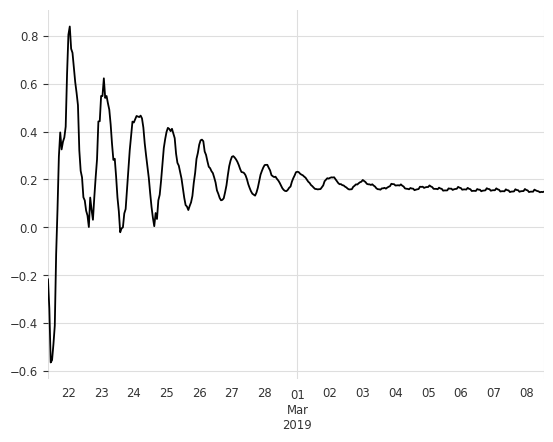

In [ ]:
print(forecast_target.plot())

/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)
/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Last time: 2019-02-21 08:00:00, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

Forecast for target variable 'SoilHeatFlux_DiffVolt1':
2019-02-21 09:00:00   -0.206280
2019-02-21 10:00:00   -0.514841
2019-02-21 11:00:00   -0.762706
2019-02-21 12:00:00   -0.629259
2019-02-21 13:00:00   -0.535725
                         ...   
2019-03-08 09:00:00   -0.294763
2019-03-08 10:00:00   -0.063099
2019-03-08 11:00:00    0.183609
2019-03-08 12:00:00    0.293892
2019-03-08 13:00:00    0.537765
Freq: h, Length: 365, dtype: float64


/tmp/ipykernel_36/978743170.py:49: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')


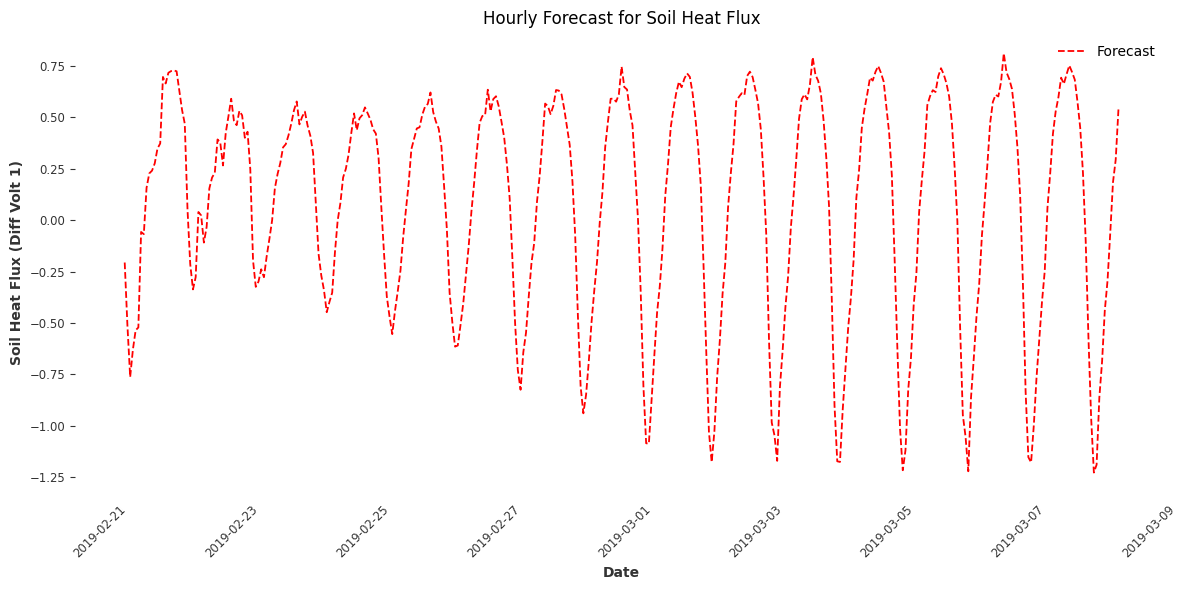

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel

# Select only the relevant numeric features for training
features = ['Month', 'VolSWC_20cm', 'Hour',
            'SoilTemp_10cm', 'VolSWC_10cm', 'SoilTemp_40cm',
            'NET_Radiation', 'SoilTemp_20cm', 'SoilHeatFlux_DiffVolt1']

# Create TimeSeries from the selected features for training and validation sets
train_transformed = TimeSeries.from_dataframe(train_df[features], freq='H')
val_transformed = TimeSeries.from_dataframe(val_df[features], freq='H')

# Initialize the model
model = TCNModel(
    input_chunk_length=30,
    output_chunk_length=7,
    n_epochs=50,
    dropout=0.1,
    dilation_base=2,
    weight_norm=False,
    kernel_size=3,
    num_filters=8,
    random_state=0
)

# Fit the model
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True
)

# Perform forecasting
forecast = model.predict(n=365)

# Extract and print forecast for the target variable alone
target_variable_name = 'SoilHeatFlux_DiffVolt1'
forecast_df = forecast.pd_dataframe()

# Check the type and value of last_time
last_time = train_transformed.end_time()  # Get the last time from the training series
print(f"Last time: {last_time}, Type: {type(last_time)}")  # Debugging output

# Ensure last_time is a datetime object
if isinstance(last_time, pd.Timestamp):
    # Create a new forecast index starting from the last time
    forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=365, freq='H')
else:
    raise TypeError("last_time is not a valid datetime object. It is of type: {}".format(type(last_time)))

# Create a Series for the forecast with the new index
forecast_target = pd.Series(forecast_df[target_variable_name].values, index=forecast_index)

print(f"\nForecast for target variable '{target_variable_name}':")
print(forecast_target)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_target.index, forecast_target, label='Forecast', color='red', linestyle='--')
plt.title('Hourly Forecast for Soil Heat Flux')
plt.xlabel('Date')
plt.ylabel('Soil Heat Flux (Diff Volt 1)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)
/opt/conda/lib/python3.10/site-packages/darts/timeseries.py:4804: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

/tmp/ipykernel_36/793260920.py:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=start_date, periods=8760, freq='H')



Forecast for target variable 'SoilHeatFlux_DiffVolt1':
2018-01-01 00:00:00   -0.491649
2018-01-01 01:00:00   -0.795636
2018-01-01 02:00:00   -1.138284
2018-01-01 03:00:00   -1.104678
2018-01-01 04:00:00   -0.882070
                         ...   
2018-12-31 19:00:00   -0.348414
2018-12-31 20:00:00   -0.338848
2018-12-31 21:00:00   -0.326554
2018-12-31 22:00:00   -0.339872
2018-12-31 23:00:00   -0.341165
Freq: h, Length: 8760, dtype: float64


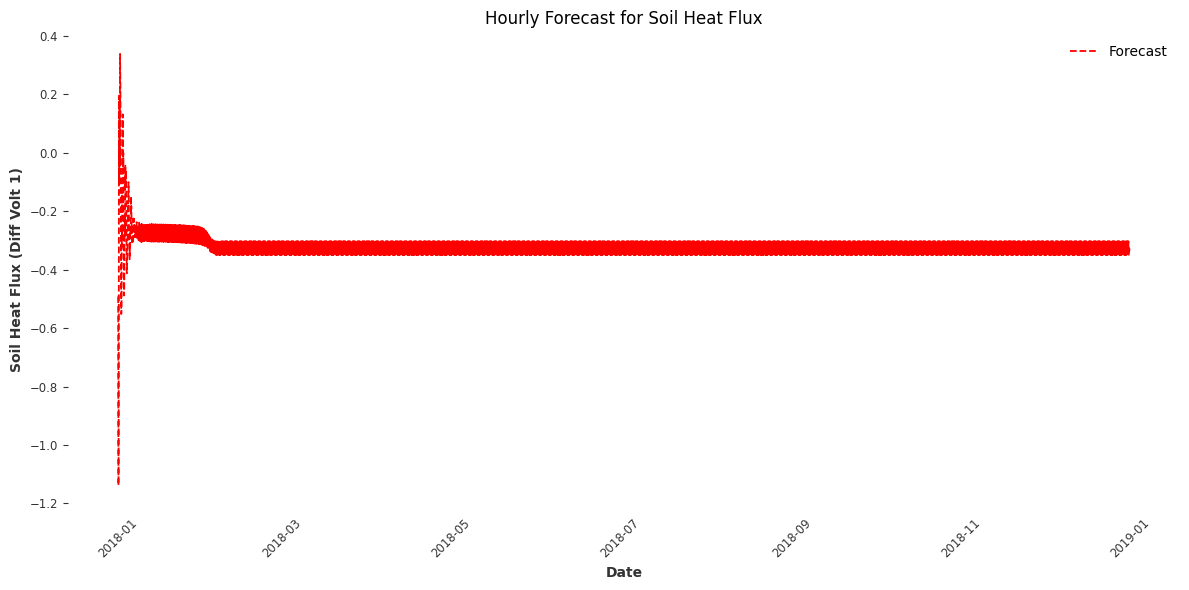

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel

# Select only the relevant numeric features for training
features = ['Month', 'VolSWC_20cm', 'Hour',
            'SoilTemp_10cm', 'VolSWC_10cm', 'SoilTemp_40cm',
            'NET_Radiation', 'SoilTemp_20cm', 'SoilHeatFlux_DiffVolt1']

# Create TimeSeries from the selected features for training and validation sets
train_transformed = TimeSeries.from_dataframe(train_df[features], freq='H')
val_transformed = TimeSeries.from_dataframe(val_df[features], freq='H')

# Initialize the model
model = TCNModel(
    input_chunk_length=30,
    output_chunk_length=7,
    n_epochs=10,
    dropout=0.1,
    dilation_base=2,
    weight_norm=False,
    kernel_size=3,
    num_filters=8,
    random_state=0
)

# Fit the model
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True
)

# Perform forecasting
forecast = model.predict(n=8760)  # Forecast for the entire year (365 days * 24 hours)

# Extract and print forecast for the target variable alone
target_variable_name = 'SoilHeatFlux_DiffVolt1'
forecast_df = forecast.pd_dataframe()

# Create a new forecast index for the entire year
start_date = train_transformed.start_time().replace(month=1, day=1, hour=0)
forecast_index = pd.date_range(start=start_date, periods=8760, freq='H')

# Create a Series for the forecast with the new index
forecast_target = pd.Series(forecast_df[target_variable_name].values, index=forecast_index)

print(f"\nForecast for target variable '{target_variable_name}':")
print(forecast_target)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_target.index, forecast_target, label='Forecast', color='red', linestyle='--')
plt.title('Hourly Forecast for Soil Heat Flux')
plt.xlabel('Date')
plt.ylabel('Soil Heat Flux (Diff Volt 1)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()